In [1]:
import pandas as pd
df=pd.read_csv('Titanic.csv')
df=df[:100]

In [2]:
df.shape

(100, 9)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [6]:
df['Sex'].value_counts()

Sex
Male      61
female    39
Name: count, dtype: int64

# Data Visualization

<Axes: xlabel='Sex', ylabel='count'>

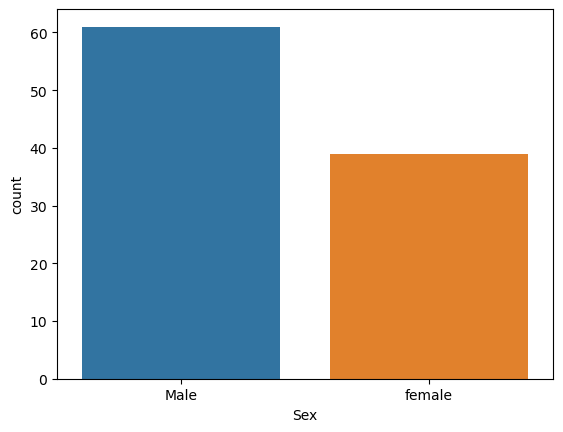

In [7]:
import seaborn as sns
sns.countplot(x='Sex',data=df)

In [8]:
positive_review=list(df[df['Sex']=='Male']['SibSp'])
negative_review=list(df[df['Sex']=='Female']['SibSp'])

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

# Data Splitting

In [10]:
df_x=df['Sex']
df_y=df['SibSp']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x[:1000], df_y[:1000], test_size=0.2, random_state=0)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80,), (20,), (80,), (20,))

In [13]:
y_train.value_counts()

SibSp
0    45
1    24
3     4
2     3
5     2
4     2
Name: count, dtype: int64

In [14]:
y_test.value_counts()

SibSp
0    14
1     3
3     2
4     1
Name: count, dtype: int64

In [15]:
X_train

43    female
62      Male
3     female
71      Male
45      Male
       ...  
96      Male
67    female
64      Male
47    female
44    female
Name: Sex, Length: 80, dtype: object

# Data Processing

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 10,ngram_range=(1,2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [17]:
X_train_bow.shape,X_test_bow.shape

((80, 2), (20, 2))

In [18]:
X_test_bow.toarray()[0].shape

(2,)

In [19]:
list(X_test_bow.toarray()[0])

[0.0, 1.0]